In [52]:
import pandas as pd 
import matplotlib.pyplot as plt

In [53]:
file_path = "/Users/sanjeevani1109/Desktop/Master's/TU Dortmund/passes.csv"

In [54]:
df = pd.read_csv(file_path, delimiter=';')

In [55]:
df

,game_id,passing_quote,winner
0,11,72.0,No
1,11,91.0,Yes
2,12,82.0,Yes
3,12,86.0,No
4,13,82.0,Yes
...,...,...,...
301,177,81.0,Yes
302,178,73.0,No
303,178,74.0,No
304,179,74.0,Yes


In [56]:
df.isnull().sum()

game_id          0
passing_quote    2
winner           2
dtype: int64

In [57]:
df.dropna(inplace=True)

In [58]:
df

,game_id,passing_quote,winner
0,11,72.0,No
1,11,91.0,Yes
2,12,82.0,Yes
3,12,86.0,No
4,13,82.0,Yes
...,...,...,...
301,177,81.0,Yes
302,178,73.0,No
303,178,74.0,No
304,179,74.0,Yes


In [59]:
df.isnull().sum()

game_id          0
passing_quote    0
winner           0
dtype: int64

In [60]:
df['passing_quote'] = df['passing_quote'].astype(float)  # Ensure passing_quote is float

In [61]:
df['passing_quote'].describe()

count    304.000000
mean      79.680921
std        6.960058
min       53.000000
25%       75.000000
50%       80.000000
75%       85.000000
max       92.000000
Name: passing_quote, dtype: float64

In [62]:
print("Skewness of passing rates:", df['passing_quote'].skew())

Skewness of passing rates: -0.7035193986149534


In [63]:
# Interquartile Range (IQR)
Q1 = df['passing_quote'].quantile(0.25)
Q3 = df['passing_quote'].quantile(0.75)
IQR = Q3 - Q1
print("Interquartile Range:", IQR)

Interquartile Range: 10.0


In [64]:
# Creating separate dataframes for wins, losses, and draws
wins = df[df['winner']=='Yes']['passing_quote']
losses = df[df['winner']=='No']['passing_quote']
draws = df.groupby('game_id').filter(lambda x: (x['winner'] == 'No').all())

In [65]:
wins.describe()

count    114.000000
mean      81.078947
std        8.064063
min       53.000000
25%       76.250000
50%       83.000000
75%       87.000000
max       92.000000
Name: passing_quote, dtype: float64

In [66]:
print("Skewness of winners passing rates:", wins.skew())

Skewness of winners passing rates: -1.0559277069135216


In [67]:
losses.head(2)

0    72.0
3    86.0
Name: passing_quote, dtype: float64

In [68]:
losses.describe()

count    190.000000
mean      78.842105
std        6.074173
min       59.000000
25%       75.000000
50%       79.000000
75%       83.000000
max       90.000000
Name: passing_quote, dtype: float64

In [69]:
print("Skewness of losers passing rates:", losses.skew())

Skewness of losers passing rates: -0.5582343407336847


In [70]:
draws.head(2)

,game_id,passing_quote,winner
8,15,85.0,No
9,15,77.0,No


In [71]:
draws['passing_quote'].describe()

count    76.000000
mean     78.210526
std       7.250408
min      59.000000
25%      73.000000
50%      79.500000
75%      85.000000
max      89.000000
Name: passing_quote, dtype: float64

In [72]:
print("Skewness of draws passing rates:", draws['passing_quote'].skew())

Skewness of draws passing rates: -0.5493677962657125


In [73]:
mean_passing_rate_wins = wins.mean()
mean_passing_rate_losses = losses.mean()
mean_passing_rate_draws = draws['passing_quote'].mean() if not draws.empty else None

print("Average Passing Rate of Winners:", mean_passing_rate_wins)
print("Average Passing Rate of Losers:", mean_passing_rate_losses)
print("Average Passing Rate in Draws:", mean_passing_rate_draws)

Average Passing Rate of Winners: 81.07894736842105
Average Passing Rate of Losers: 78.84210526315789
Average Passing Rate in Draws: 78.21052631578948


In [74]:
median_passing_rate_wins = wins.median()
median_passing_rate_losses = losses.median()
median_passing_rate_draws = draws['passing_quote'].median() if not draws.empty else None

print("Median Passing Rate of Winners:", median_passing_rate_wins)
print("Median Passing Rate of Losers:", median_passing_rate_losses)
print("Median Passing Rate in Draws:", median_passing_rate_draws)

Median Passing Rate of Winners: 83.0
Median Passing Rate of Losers: 79.0
Median Passing Rate in Draws: 79.5


In [75]:
mode_passing_rate_wins = wins.mode()
mode_passing_rate_losses = losses.mode()
mode_passing_rate_draws = draws['passing_quote'].mode() if not draws.empty else None

print("Mode Passing Rate of Winners:", mode_passing_rate_wins)
print("Mode Passing Rate of Losers:", mode_passing_rate_losses)
print("Mode Passing Rate in Draws:", mode_passing_rate_draws)

Mode Passing Rate of Winners: 0    87.0
Name: passing_quote, dtype: float64
Mode Passing Rate of Losers: 0    80.0
1    82.0
Name: passing_quote, dtype: float64
Mode Passing Rate in Draws: 0    87.0
Name: passing_quote, dtype: float64


In [76]:
# Calculating Standard Deviation
std_dev_wins = wins.std()
std_dev_losses = losses.std()
std_dev_draws = draws['passing_quote'].std() if not draws.empty else None

print("Standard Deviation Passing Rate of Winners:", std_dev_wins)
print("Standard Deviation Passing Rate of Losers:", std_dev_losses)
print("Standard Deviation Passing Rate in Draws:", std_dev_draws)

Standard Deviation Passing Rate of Winners: 8.06406289574839
Standard Deviation Passing Rate of Losers: 6.074172557969795
Standard Deviation Passing Rate in Draws: 7.2504083369581025


In [77]:
# Calculate Interquartile Range
iqr_wins = wins.quantile(0.75) - wins.quantile(0.25)
iqr_losses = losses.quantile(0.75) - losses.quantile(0.25)
iqr_draws = draws['passing_quote'].quantile(0.75) - draws['passing_quote'].quantile(0.25) if not draws.empty else None
iqr_df = df['passing_quote'].quantile(0.75) - df['passing_quote'].quantile(0.25)


print("IQR Winners:", iqr_wins)
print("IQR Losers:", iqr_losses)
print("IQR Draws:", iqr_draws)
print("IQR DF:", iqr_df)

IQR Winners: 10.75
IQR Losers: 8.0
IQR Draws: 12.0
IQR DF: 10.0


In [78]:
games_with_winner = df.groupby('game_id').filter(lambda x: len(x) == 2 and any(x['winner'] != 'No'))
print(games_with_winner)

     game_id  passing_quote winner
0         11           72.0     No
1         11           91.0    Yes
2         12           82.0    Yes
3         12           86.0     No
4         13           82.0    Yes
..       ...            ...    ...
299      176           91.0    Yes
300      177           78.0     No
301      177           81.0    Yes
304      179           74.0    Yes
305      179           89.0     No

[228 rows x 3 columns]


In [79]:
draws = df[df['winner'] == 'No'].groupby('game_id').filter(lambda x: len(x) == 2)
print(draws)

     game_id  passing_quote winner
8         15           85.0     No
9         15           77.0     No
24        24           65.0     No
25        24           76.0     No
32        28           67.0     No
..       ...            ...    ...
295      174           77.0     No
296      175           84.0     No
297      175           76.0     No
302      178           73.0     No
303      178           74.0     No

[76 rows x 3 columns]


In [80]:
# Identify games that ended in a draw
draw_games = df.groupby('game_id').filter(lambda x: all(x['winner'] == 'No'))

# Identify games with a winner
winner_games = df.groupby('game_id').filter(lambda x: any(x['winner'] == 'Yes'))

In [81]:
# Calculate differences in passing rates for games with a winner
winner_diff = winner_games.groupby('game_id').apply(
    lambda x: abs(x.loc[x['winner'] == 'Yes', 'passing_quote'].values[0] - x.loc[x['winner'] == 'No', 'passing_quote'].values[0])
).reset_index(name='passing_rate_diff')

# Calculate differences in passing rates for games that ended in a draw
draw_diff = draw_games.groupby('game_id').apply(
    lambda x: abs(x['passing_quote'].values[0] - x['passing_quote'].values[1])
).reset_index(name='passing_rate_diff')

/var/folders/n5/f6xjtlr526zbr86__yns243m0000gn/T/ipykernel_23016/580050710.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  winner_diff = winner_games.groupby('game_id').apply(
/var/folders/n5/f6xjtlr526zbr86__yns243m0000gn/T/ipykernel_23016/580050710.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  draw_diff = draw_games.groupby('game_id').apply(


In [82]:
avgwinratediff = winner_diff['passing_rate_diff'].mean()
avgdrawratediff = draw_diff['passing_rate_diff'].mean()

# Visualization for passing rate in Wins v/s Losses

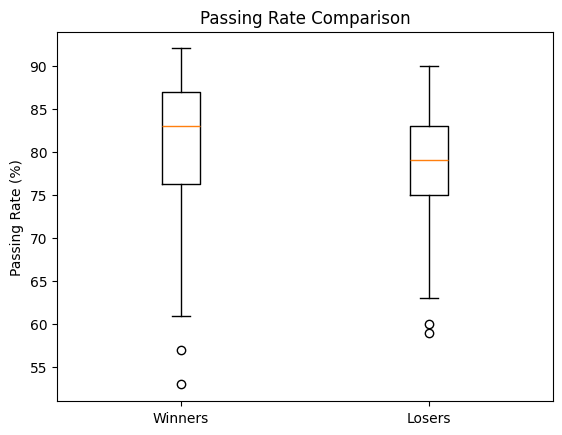

In [83]:
plt.boxplot([wins, losses], labels=['Winners', 'Losers'])
plt.title('Passing Rate Comparison')
plt.ylabel('Passing Rate (%)')
plt.show()

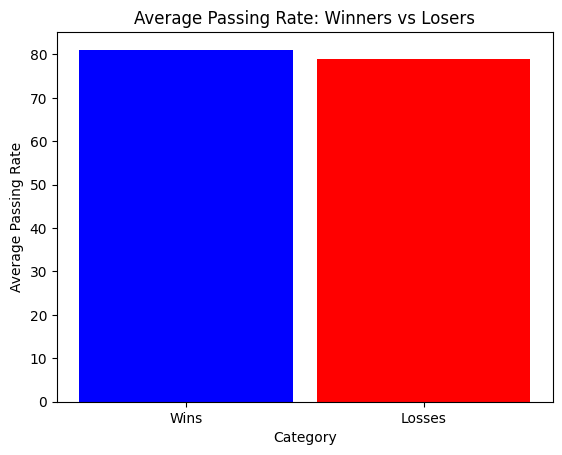

In [84]:
categories = ['Wins', 'Losses']
values = [mean_passing_rate_wins, mean_passing_rate_losses]

plt.bar(categories, values, color=['blue', 'red'], width=0.9)
plt.xlabel('Category')
plt.ylabel('Average Passing Rate')
plt.title('Average Passing Rate: Winners vs Losers')
plt.show()

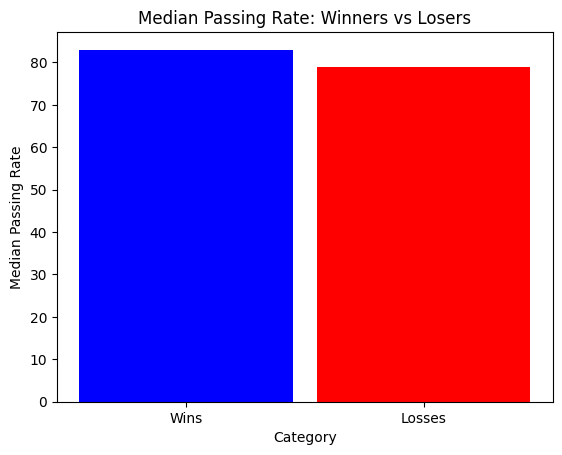

In [85]:
medcategs = ['Wins', 'Losses']
medvals = [median_passing_rate_wins, median_passing_rate_losses]

plt.bar(medcategs, medvals, color=['blue', 'red'], width=0.9)
plt.xlabel('Category')
plt.ylabel('Median Passing Rate')
plt.title('Median Passing Rate: Winners vs Losers')
plt.show()

# Visualization for passing rate in Wins v/s Draws


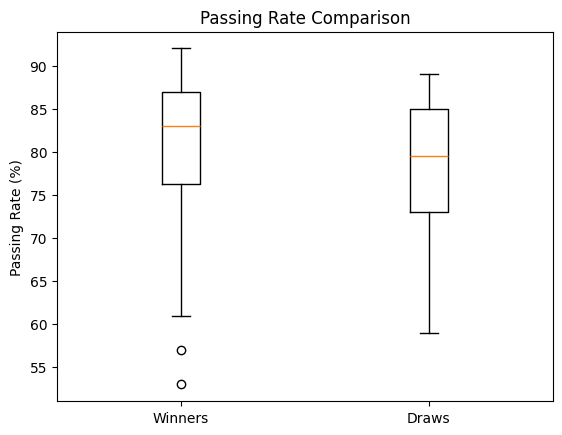

In [86]:
# Box plot for visual comparison
plt.boxplot([wins, draws['passing_quote']], labels=['Winners', 'Draws'])
plt.title('Passing Rate Comparison')
plt.ylabel('Passing Rate (%)')
plt.show()

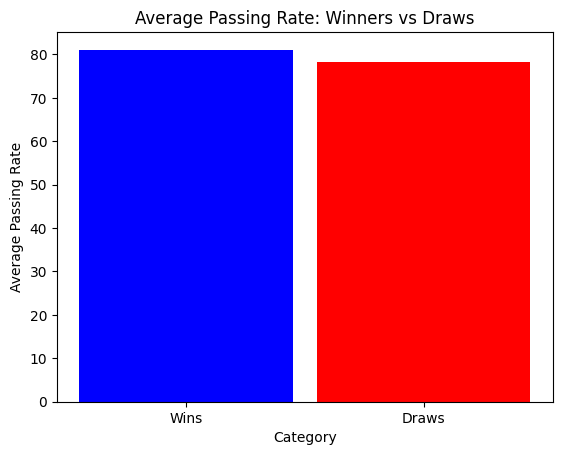

In [87]:
categs = ['Wins', 'Draws']
vals = [mean_passing_rate_wins, mean_passing_rate_draws]

plt.bar(categs, vals, color=['blue', 'red'], width=0.9)
plt.xlabel('Category')
plt.ylabel('Average Passing Rate')
plt.title('Average Passing Rate: Winners vs Draws')
plt.show()

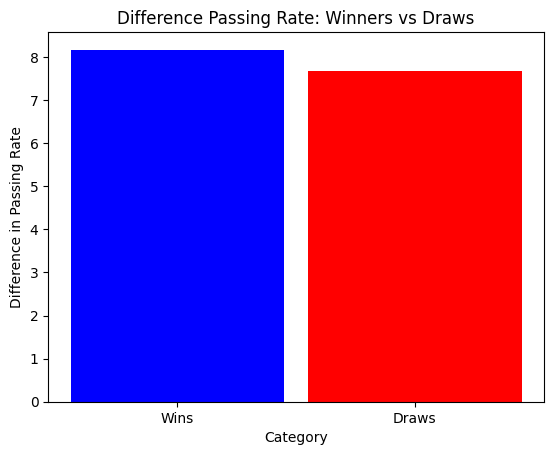

In [88]:
cats = ['Wins', 'Draws']
valss = [avgwinratediff, avgdrawratediff]

plt.bar(cats, valss, color=['blue', 'red'], width=0.9)
plt.xlabel('Category')
plt.ylabel('Difference in Passing Rate')
plt.title('Difference Passing Rate: Winners vs Draws')
plt.show()

# HYPOTHESIS TESTING

In [89]:
# Perform a two-sample t-test for passing rate between winners and losers
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(wins, losses, alternative='greater')

print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: 2.741802595638678
P-value: 0.003237382544129911


In [90]:
# Perform a t-test to compare the differences in passing rates between winners and draws
t_stat, p_value = ttest_ind(winner_diff['passing_rate_diff'], draw_diff['passing_rate_diff'], alternative='greater')

t_stat, p_value

(0.44319150260164086, 0.3291328781283943)